In [0]:
import numpy as np

In [0]:
def compute_euclidean_distance(point, centroid):
    return np.sqrt(np.sum((point - centroid)**2))

def assign_label_cluster(distance, data_point, centroids):
    index_of_minimum = min(distance, key=distance.get)
    return [index_of_minimum, data_point, centroids[index_of_minimum]]

def compute_new_centroids(cluster_label, centroids):
    return np.array(cluster_label + centroids)/2

In [0]:
def iterate_k_means(data_points, centroids, total_iteration):
    label = []
    cluster_label = []
    total_points = len(data_points)
    k = len(centroids)
    
    for iteration in range(0, total_iteration):
        for index_point in range(0, total_points):
            distance = {}
            for index_centroid in range(0, k):
                distance[index_centroid] = compute_euclidean_distance(data_points[index_point], centroids[index_centroid])
            label = assign_label_cluster(distance, data_points[index_point], centroids)
            centroids[label[0]] = compute_new_centroids(label[1], centroids[label[0]])

            if iteration == (total_iteration - 1):
                cluster_label.append(label)

    return [cluster_label, centroids]

In [0]:
import matplotlib.pyplot as plt

def print_label_data(result):
    print("Result of k-Means Clustering: \n")
    for data in result[0]:
        print("data point: {}".format(data[1]))
        print("cluster number: {} \n".format(data[0]))
        if data[0] == 0:
          c = 'r'
        elif data[0] == 1:
          c = 'g'
        else:
          c = 'b'
        plt.scatter(data[1][0], data[1][1], c = c, alpha=0.5)
        
    print("Last centroids position: \n {}".format(result[1]))
    plt.show()

def create_centroids():
    centroids = []
    centroids.append([5.0, 0.0])
    centroids.append([45.0, 70.0])
    centroids.append([50.0, 90.0])
    return np.array(centroids)

Result of k-Means Clustering: 

data point: [15. 16.]
cluster number: 0 

data point: [16.  18.5]
cluster number: 0 

data point: [17.  20.2]
cluster number: 0 

data point: [16.4  17.12]
cluster number: 0 

data point: [17.23 18.12]
cluster number: 0 

data point: [43. 43.]
cluster number: 1 

data point: [44.43  45.212]
cluster number: 1 

data point: [45.8  54.23]
cluster number: 1 

data point: [46.313 43.123]
cluster number: 1 

data point: [50.21 46.3 ]
cluster number: 1 

data point: [99.   99.22]
cluster number: 2 

data point: [100.32   98.123]
cluster number: 2 

data point: [100.32   97.423]
cluster number: 2 

data point: [102.    93.23]
cluster number: 2 

data point: [102.23  94.23]
cluster number: 2 

Last centroids position: 
 [[ 16.83483871  18.08645161]
 [ 48.02980645  46.32670968]
 [101.69677419  94.79606452]]


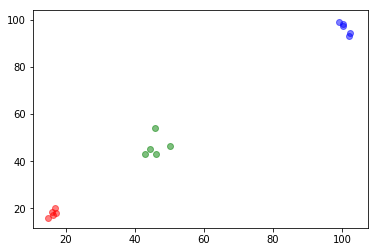

In [10]:
filename = "data.csv"
data_points = np.genfromtxt(filename, delimiter=",")
centroids = create_centroids()
total_iteration = 100

[cluster_label, new_centroids] = iterate_k_means(data_points, centroids, total_iteration)
print_label_data([cluster_label, new_centroids])